## End-to-End  Multi-Class Dog Breed Classification

This model builds a end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem
Identyfing the breed of a dog given the image of a dog.

## 2. Data
The data we are using from Kaggle Dog Breed Identification:-

https://www.kaggle.com/c/dog-breed-identification/data


## 3. Evaluation

The Evaluation is for each image in the test set, we must predict a probability for each of the different breeds.


## 4. Features

Some information about data:
* We are dealing with images(Unstructured data)
* There are 120 breeds of dog(This means that there are 120 classes)
* There are around 10,000 images in training set(These images have labels)
* There are around 10,000 imates in test set (These images have no labels)



In [1]:
## Unzip the uploaded data into google drive
#!unzip "drive/MyDrive/Dog_Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog_Vision"

## Get the workspace ready

* Import TensorFlow 2.x
* Import TensorFlow Hub
* Make sure we're are using a GPU

In [2]:
## Importing TensorFlow into colab
import tensorflow as tf

print("TensorFlow Version ",tf.__version__)

TensorFlow Version  2.15.0


In [3]:
 # Importing TenosrflowHub
import tensorflow_hub as hub
print("TF Hub version:",hub.__version__)

TF Hub version: 0.16.1


In [4]:
# Check for GPU availability
if tf.config.list_physical_devices("GPU"):
  print("GPU  is available")
else:
  print("GPU not available")

GPU  is available


## Getting our data ready(turning into tesnors)
With all ML models , our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors(numerical representations).


Let's start by accessing the data and checking the lables

In [5]:
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog_Vision/labels.csv")

In [6]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [7]:
len(labels_csv)

10222

In [8]:
labels_csv["breed"].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

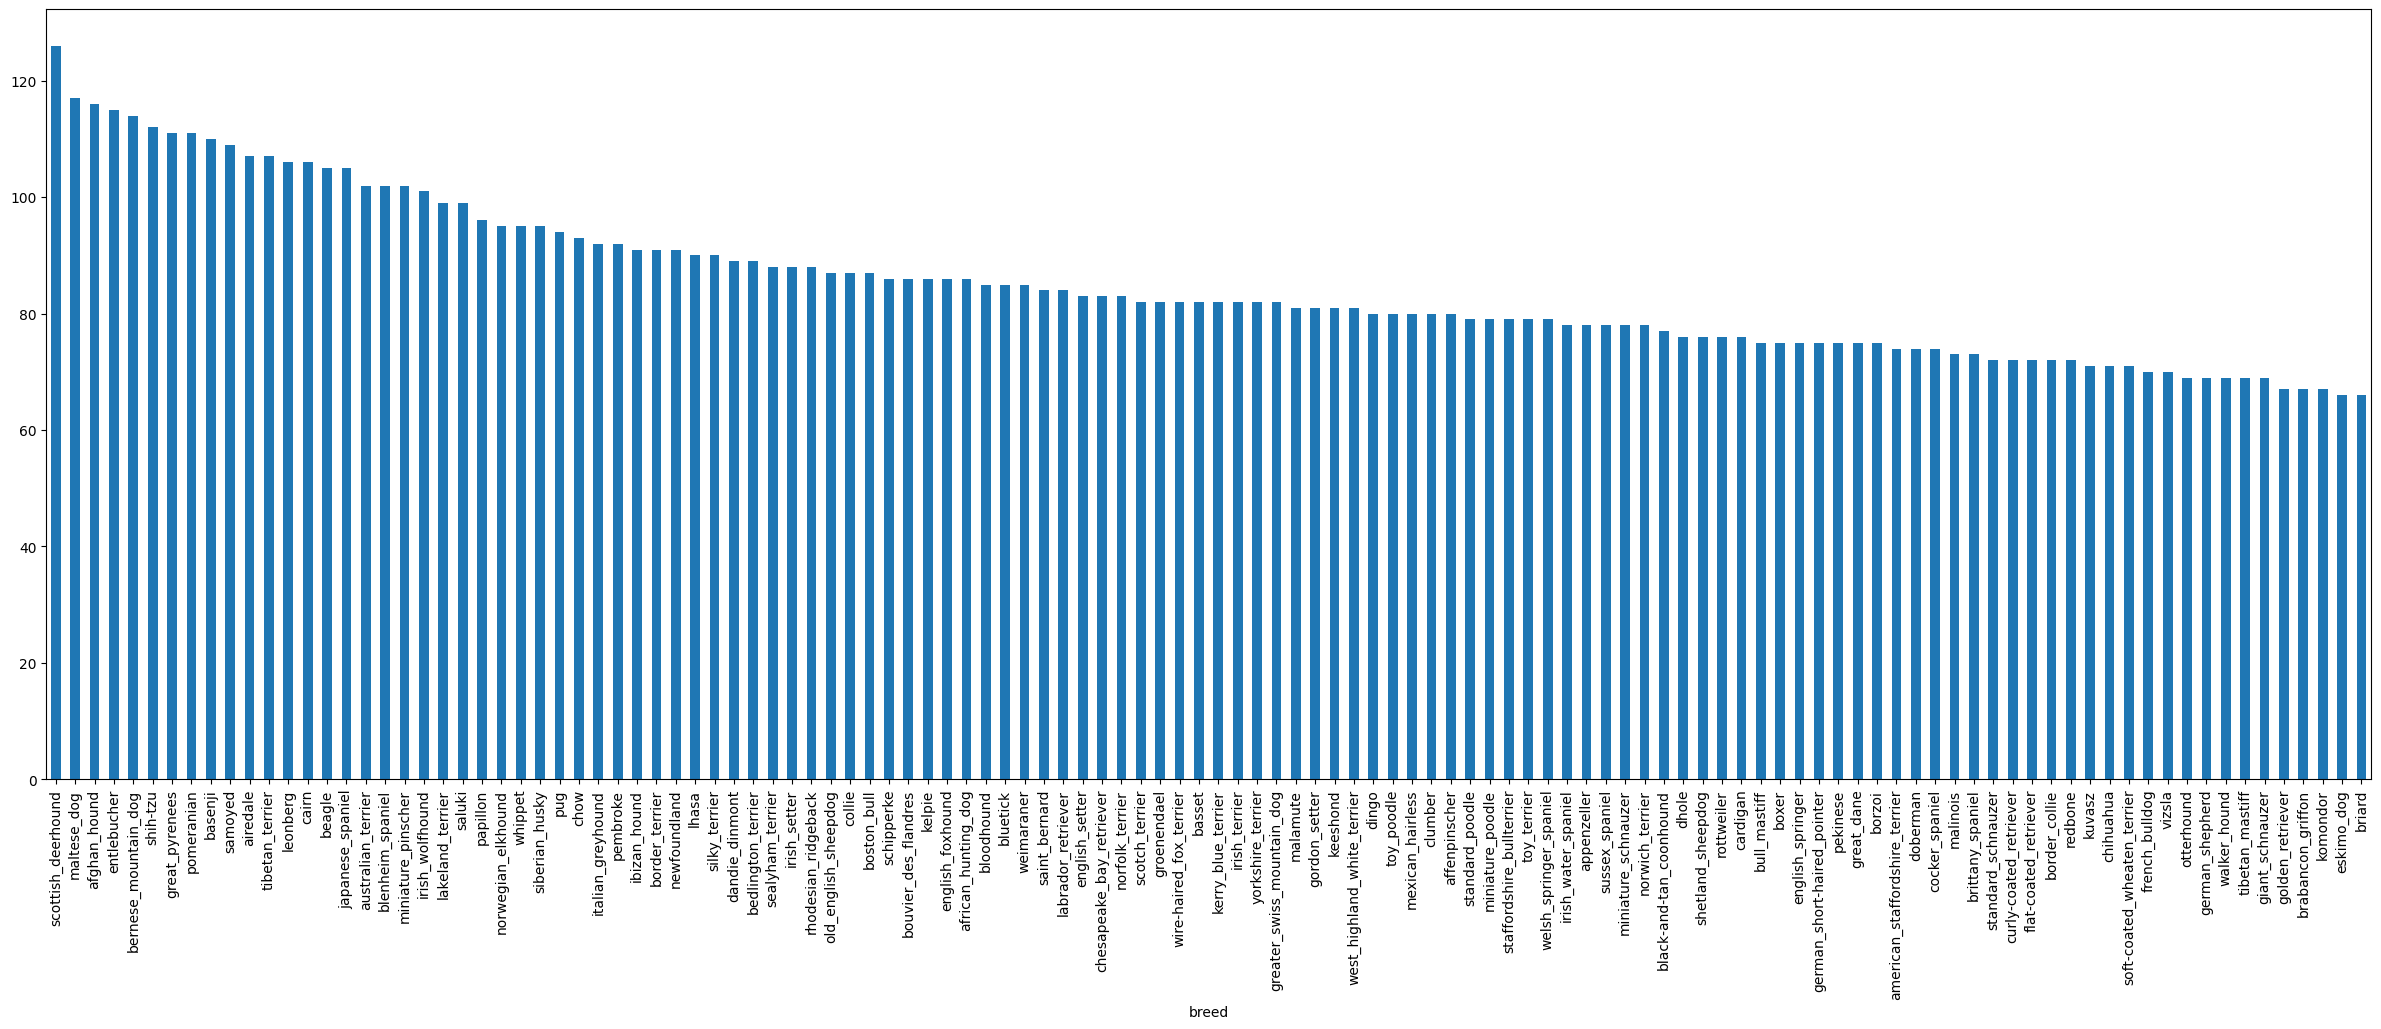

In [9]:
labels_csv["breed"].value_counts().plot(kind="bar",figsize=(30,10));

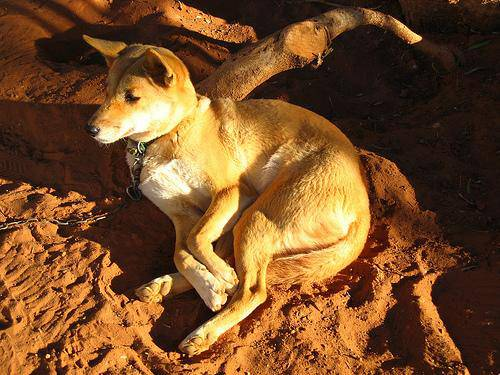

In [10]:
# Let's view an image
from IPython.display import Image
Image("drive/MyDrive/Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

## Getting images and their labels

Let's get a list of all of our image file pathnames

In [11]:
filenames = []
for file in labels_csv["id"]:
  #print(file)
  file="drive/MyDrive/Dog_Vision/train/"+file+".jpg"
  filenames.append(file)

filenames[:10]

['drive/MyDrive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog_Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog_Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog_Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog_Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog_Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog_Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog_Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog_Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

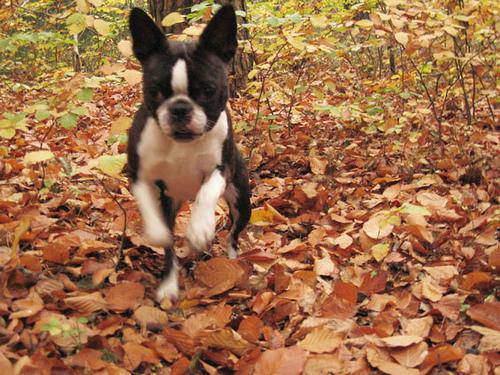

In [12]:
Image(filenames[0])
#Image(filenames[1])

In [13]:
len(filenames)

10222

In [14]:
import os
if len(os.listdir("drive/MyDrive/Dog_Vision/train/")) == len(filenames):
  print("Length matches")
else:
  print("Length does not matches")

Length matches


In [15]:
4+4

8

Since we've not got our training images filepaths as a list , let's prepare our labels

In [16]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [17]:
len(labels)

10222

see if lenght of labels matches with length of filenames
basically this is to confirm whether there is any missing values

In [18]:
if len(labels) == len(filenames):
  print("Number of labels matches with no of filenames")
else:
  print("Length does not matches")

Number of labels matches with no of filenames


In [19]:
unique_breed = np.unique(labels)

In [20]:
len(unique_breed)

120

In [21]:
import numpy as np
labels[0] == unique_breed

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [22]:
boolean_labels = [label==unique_breed for label in labels]

In [23]:
len(boolean_labels)

10222

In [24]:
boolean_labels[0] , boolean_labels[1]

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

Turning boolean array into integers

In [25]:
print(labels[0])
print(np.where(unique_breed==labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [26]:
print(labels[1])
print(boolean_labels[1].astype(int))

dingo
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [27]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

## Creating our own validation set

In [28]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [29]:
len(filenames)

10222

We're going to start off experimenting with ~1000 images and increase as needed

In [30]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param{type:"slider",min:1000,max:10000,step:1000}

In [31]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split then into training and validation of total size NUM_IMAGES
X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size = 0.2,
                                               random_state=42)

In [32]:
len(X_train) , len(X_val)  ,len(y_train)  , len(y_val)

(800, 200, 800, 200)

In [33]:
X_train[:5] , y_train[:2]

(['drive/MyDrive/Dog_Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog_Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Dog_Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Dog_Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Dog_Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

# Preprocessing Images (turning images into Tensors)

To Preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a variable `image`
3. Turn our `image`(a jpg) into Tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1)
5. Resize the `image` to be a shape of (224,224)
6. Return the modified `image`

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
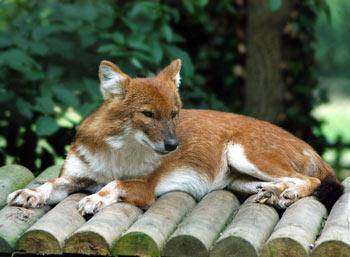

In [34]:
## Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image

In [35]:
# Turning image into tensor
tf.constant(image[:2])

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [36]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path,img_size=IMG_SIZE):
  """
    Takes an image file path and turns the image into Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical tensors with 3 colors channels (Red,Green,Blue)
  image = tf.image.decode_jpeg(image,channels=3)
  #convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image,tf.float32)
  #Resize the image to our desired value(224,224)
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image

## Turning our data into batches

Why turn our data into batches?

Let's say you are trying to process 10,000 images in one go... they all might not fit into memory.

So that's why we do about 32(this is the batch size) images at a time (you can manually adjust the batch size if needed)

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: `(image,label)`

In [37]:
# Create a simple function to return a tuple (image,label)
def get_image_label(image_path,label):
  """
  Takes an image file path name and the associated label,
  process the image and returns a tuple of (image,label)
  """
  image = process_image(image_path)
  return image,label

In [38]:
image = process_image(X[24])
image,tf.constant(y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.        , 0.02205882, 0.0004902 ],
         [0.00205707, 0.03686975, 0.00378151],
         [0.00747549, 0.04903712, 0.01661415],
         ...,
         [0.02267136, 0.07724071, 0.03515386],
         [0.04925642, 0.09582529, 0.05936681],
         [0.00441176, 0.02794118, 0.00588235]],
 
        [[0.        , 0.03921569, 0.00539216],
         [0.02015932, 0.06678046, 0.03295694],
         [0.04519433, 0.08964461, 0.05761555],
         ...,
         [0.08460237, 0.14753135, 0.1039739 ],
         [0.10557685, 0.16096902, 0.12028274],
         [0.02205882, 0.07745098, 0.03676471]],
 
        [[0.        , 0.03921569, 0.00784314],
         [0.02633053, 0.06883754, 0.03746499],
         [0.05254727, 0.09568454, 0.06431198],
         ...,
         [0.08066337, 0.1504638 , 0.10379888],
         [0.08968931, 0.15733637, 0.11174814],
         [0.        , 0.06764706, 0.02205883]],
 
        ...,
 
        [[0.00490196, 0.02009804

Now let's make a function to turn all of our data (x&y) into batches!

In [39]:
# Define the batch size , 32 is a good size

BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as imput (no labels).
  """

  # If the data is a test dataset, we  don't have labels
  if test_data:
    print("Creating test data batches...")
    data  = tf.data.Dataset.from_tensor_slices((tf.constant(X)))  # only filepahts (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating Validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),   # filepaths
                                               tf.constant(y)))  # labels

    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))

    # Shuffling the pathnames and labels
    data = data.shuffle(buffer_size=len(X))

    # Create (image,label) tuples (this also turns the image path into preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into  batches
    data_batch = data.batch(BATCH_SIZE)

    return data_batch


In [40]:
# Create training and validation data batches

train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val,valid_data=True)

Creating training data batches...
Creating Validation data batches...


In [41]:
# Check out different attributesof our data batches
train_data.element_spec , val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualize our data batches

Our data is now in batches these can be little hard to comprehend/understand

In [42]:
import matplotlib.pyplot as plt

def show_25_images(images,labels):
  """
  Displays a plot of 25 images along with labels from a  data batch
  """

  # Setup the figure
  figure = plt.figure(figsize=(15,10))

  for i in range(25):
    # Create subplots of 5 rows and 5 columns
    ax = plt.subplot(5,5,i+1)

    # Display the image
    plt.imshow(images[i])

    # Add the images labels as title
    plt.title(unique_breed[labels[i].argmax()])

    # Turn the grid line off
    plt.axis("off")



In [43]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

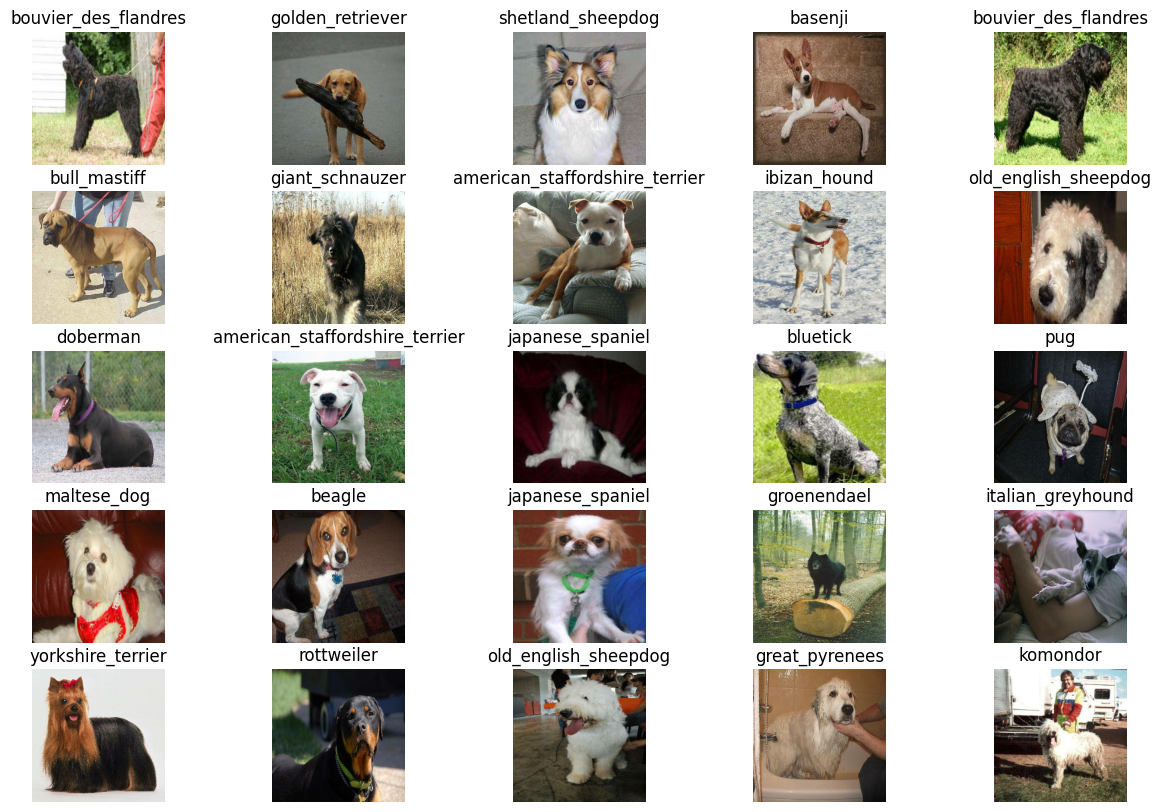

In [44]:
# Now let's visualize our data in training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

In [45]:
train_images[1],train_labels[1]

(array([[[0.3167367 , 0.33634454, 0.31281513],
         [0.3167367 , 0.33634454, 0.31281513],
         [0.3167367 , 0.33634454, 0.31281513],
         ...,
         [0.33333334, 0.3372549 , 0.31764707],
         [0.30077025, 0.33000705, 0.3019608 ],
         [0.29411766, 0.33333334, 0.3019608 ]],
 
        [[0.2992297 , 0.31883755, 0.29530814],
         [0.2992297 , 0.31883755, 0.29530814],
         [0.2992297 , 0.31883755, 0.29530814],
         ...,
         [0.33333334, 0.3372549 , 0.31764707],
         [0.3052871 , 0.32608548, 0.3019608 ],
         [0.3019608 , 0.32941177, 0.3019608 ]],
 
        [[0.30227593, 0.32188377, 0.29835436],
         [0.30227593, 0.32188377, 0.29835436],
         [0.30227593, 0.32188377, 0.29835436],
         ...,
         [0.33333334, 0.3372549 , 0.31764707],
         [0.30533493, 0.32603765, 0.3019608 ],
         [0.30227593, 0.32909665, 0.3019608 ]],
 
        ...,
 
        [[0.53057134, 0.53449285, 0.51488507],
         [0.27860564, 0.2825272 , 0.26291

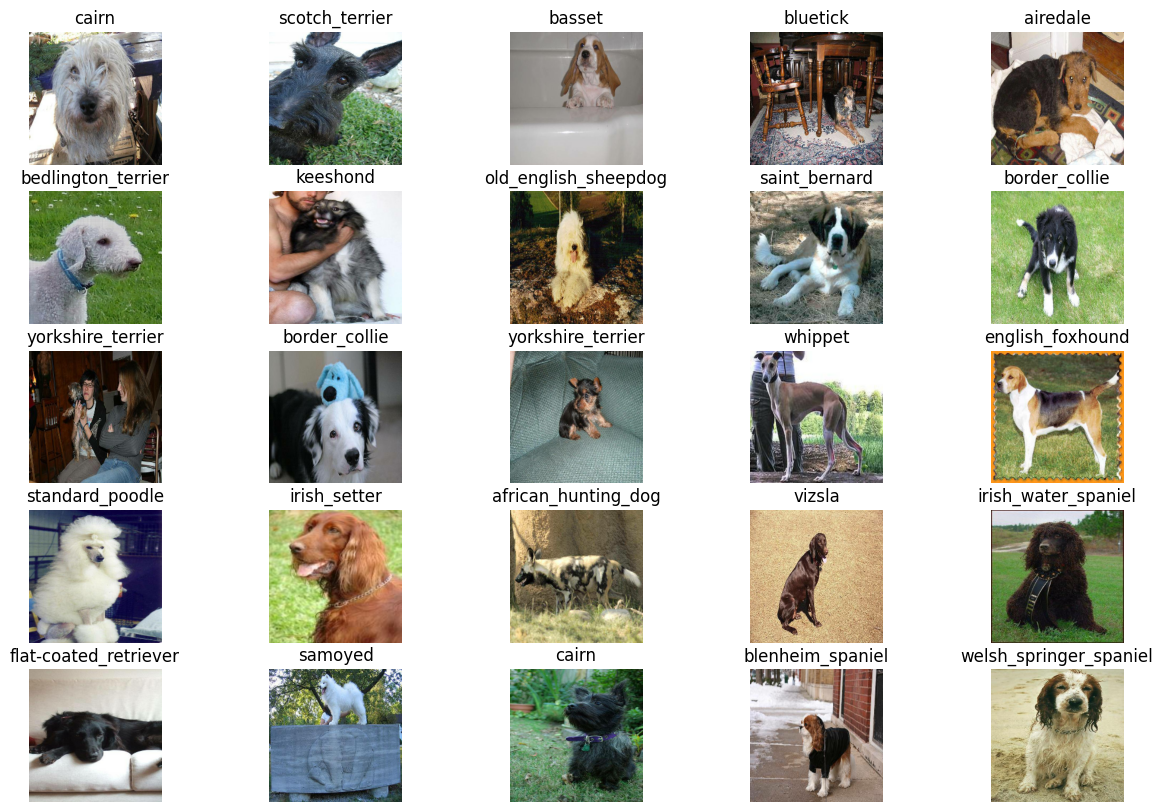

In [46]:
# Now let's visualize for data in validation batch
val_images , val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

In [47]:
train_labels[1].argmax()

49

## Building a model

Before we build a model there are few things we need to define:

1. The input shape(our images shape,in the form of Tensors) to our model

2. The output shape(image labels in the form of Tensors) of our model

3. The URL of the model we want to use from TesnorFlow Hub - "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [48]:
# Setup the input shape of the model
INPUT_SHAPE = [None, IMG_SIZE,IMG_SIZE,3]  # batch , height ,width , colour channel

# Setup the output shape of the model
OUTPUT_SHAPE = len(unique_breed)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we've got our inputs , outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this let's create a function which:
1. Takes the input shape , output shape and the model we've chosen as parameters
2. Define the layers in a Keras model in sequential fashion (do this first , then this and then that)
3. Compiles the model(says it should be evaluated and improved)
4. Builds the model(tells the model the input shape it'll be getting)
5. Returns the model

In [49]:
# Creating a model which builds Keras model

def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building model with:",MODEL_URL)

  #Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),  # Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax")  # Layer 2 (output layer)
  ])

  # Compile the layer
  model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)
  return model

In [50]:
model=create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.


We'll create 2 callbacks , 1 for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

## TesnorBoard Callback

To setup a TenosrBoard  callback, we need to do 3 things:
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with the `%tenosrborard` magic function (we'll do this after model training ).

In [51]:
# Load TenosrBoard notebook extension
%load_ext tensorboard

In [52]:
import datetime

  # Create a function to build a TensorBoard callback
def create_tensorboard_callback():
    logdir = os.path.join("drive/MyDrive/Dog_Vision/logs",
                          # Make it so that logs get tracked whenever we run an experiment
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

## Early stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

In [53]:
## Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model(on subset of data)

Our first model is only going to train on 1000 images , to make sure everything is working

In [54]:
NUM_EPOCHS = 100 #@param {type:"slider",min:10,max:100,step:10}

## Let's create  a function which trains a model.

1. Create a model using `create_model()`
2. Setup a TensorBoard callback using `create_tensorboard_callback()`
3. Call the `fit()` function on our model passing it the training data,validation,number of epochs to train for(`NUM_EPOCHS`) and the callbacks we'd like to use
4. Return the model


In [55]:
# Build a function to train and return a trained model

def train_model():
  """
  Trains a given model and returns the trained version.
  """

  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created

  model.fit(x=train_data,
            epochs = NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
  # Return the fitted model
  return model

In [56]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 307s 12s/step - loss: 4.6887 - accuracy: 0.0850 - val_loss: 3.4812 - val_accuracy: 0.2550
Epoch 2/100
25/25 [==============================] - 6s 226ms/step - loss: 1.6786 - accuracy: 0.6737 - val_loss: 2.1672 - val_accuracy: 0.4800
Epoch 3/100
25/25 [==============================] - 4s 163ms/step - loss: 0.5845 - accuracy: 0.9300 - val_loss: 1.6730 - val_accuracy: 0.5600
Epoch 4/100
25/25 [==============================] - 3s 139ms/step - loss: 0.2559 - accuracy: 0.9875 - val_loss: 1.4955 - val_accuracy: 0.6150
Epoch 5/100
25/25 [==============================] - 5s 191ms/step - loss: 0.1500 - accuracy: 0.9962 - val_loss: 1.3860 - val_accuracy: 0.6100
Epoch 6/100
25/25 [==============================] - 5s 218ms/step - loss: 0.1019 - accuracy: 0.9975 - val_loss: 1.3364 - val_accuracy: 0.6400
Epoch 7/100
25/25 [==============================

## Checking the TensorBoard logs

The Tensorboard magic funcion(`%tensorboard`)
will access the logs directory we created earlier and visualize its contents.

In [57]:
%tensorboard --logdir drive/MyDrive/Dog_Vision/logs

<IPython.core.display.Javascript object>

## Making and evaluating predictions using a trained model

In [58]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [59]:
# Make predictions on the validation data(not used to train on)
predictions = model.predict(val_data,verbose = 1)
predictions[0]

7/7 [==============================] - 1s 106ms/step


array([1.03444105e-03, 1.86754609e-04, 1.80331978e-03, 2.11527484e-04,
       1.19765406e-03, 1.24568687e-04, 1.80618428e-02, 7.18373456e-04,
       9.46812681e-04, 4.26339655e-04, 7.69001141e-04, 3.45449429e-04,
       4.22139885e-04, 1.49429674e-04, 9.23999934e-04, 7.05759914e-04,
       6.00648127e-05, 1.69319168e-01, 7.87689532e-06, 1.89852202e-04,
       5.14040177e-04, 1.41387616e-04, 1.55718051e-04, 4.80938208e-04,
       1.56915048e-04, 2.34532781e-04, 2.59625316e-01, 2.88332412e-05,
       7.37151306e-04, 1.31132070e-03, 1.13477450e-04, 2.41365423e-03,
       5.81321830e-04, 2.86594994e-04, 9.79844481e-05, 1.04401931e-01,
       1.51615764e-04, 1.09780568e-03, 8.16522297e-05, 8.84118926e-05,
       4.92493622e-04, 1.05144638e-04, 1.32307981e-03, 3.09193070e-04,
       9.92683636e-06, 3.43318563e-04, 4.85542769e-05, 4.02025995e-04,
       3.55292548e-04, 8.79788131e-05, 1.15048501e-03, 6.06442445e-05,
       3.48165631e-04, 8.53146994e-05, 1.84001416e-04, 1.73179360e-04,
      

In [60]:
predictions[0][predictions[0].argmax()]

0.25962532

In [61]:
unique_breed[predictions[0].argmax()]

'cairn'

In [62]:
## Making our first predictions
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breed[np.argmax(predictions[index])]}")

[2.07815567e-04 1.12939364e-04 3.78511875e-04 4.32639965e-04
 5.53548103e-03 7.23932229e-04 4.55708330e-04 2.82837288e-03
 7.43017644e-02 1.02168448e-01 1.65334597e-04 4.27038976e-05
 8.50103097e-04 1.87221281e-02 8.37646145e-03 1.13677904e-02
 8.63402092e-05 1.06993574e-03 1.70910746e-04 4.72844637e-04
 4.22475387e-05 8.84681183e-04 1.32537578e-04 7.44616482e-05
 1.84313022e-02 1.44632766e-04 1.27268722e-04 1.31748326e-04
 5.53727616e-04 6.45896245e-04 3.00865911e-04 1.29951269e-03
 1.95945468e-04 3.62575229e-04 2.40410780e-04 4.13224159e-04
 7.54111621e-04 1.00570126e-03 2.66773015e-04 2.27268681e-01
 3.29418201e-03 3.89463414e-04 5.84109081e-03 2.43356371e-05
 1.99435675e-03 2.49533314e-05 2.50061334e-04 8.84767738e-04
 2.29517100e-04 1.02993869e-03 1.21830660e-03 8.55933395e-05
 9.20323131e-04 7.35827116e-03 2.05055068e-04 8.61581066e-04
 7.83995376e-04 5.07589211e-05 9.07017908e-04 1.10902365e-04
 7.87425597e-05 1.59101840e-03 5.92791039e-05 1.76096568e-04
 2.87369709e-04 2.483615

In [63]:
# Turn prediction probabilities into their respective label (easier to understand)

def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breed[np.argmax(prediction_probabilities)]

In [64]:
get_pred_label(predictions[1])

'miniature_schnauzer'

Now since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels)

In [65]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [66]:
# Create a function to unbatch the batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image,label) Tensor and returns separate arrays of images and labels
  """
  images = []
  labels = []

  # Loop through unbatch data
  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breed[label.argmax()])
  return images,labels

# Unbatchify the validation data
val_images,val_labels = unbatchify(val_data)
val_images[0],val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get:
*   Prediction label
*   Validation labels(truth labels)
*   Validation images

Let's make some function to make these all a bit more visualize


We'll create a function which:

*   Takes an array of prediction probabilities, an array of truth labels and an array of images and integers.
*   Convert the prediction probabilities to a predicted label
*   Plot the predicted label its probability, the truth label and the target image on a single plot.







In [67]:
def plot_pred(prediction_probabilities,labels,images,n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob , true_label , image = prediction_probabilities[n] , labels[n] , images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot the image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if(pred_label == true_label):
    color = "green"
  else:
    color = "red"

  # Change the plot title to be predicted , probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,np.max(pred_prob)*100,true_label),color=color)

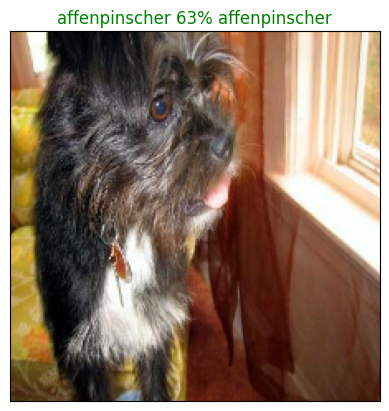

In [68]:
plot_pred(predictions,val_labels,val_images,n=55)

Now we've got one function to visualize our model top predictions, let's make another to view our model top 10 predictions.

This function will:

*   Take an input of prediction probabilities array and a ground truth array and an integer
*   Find the prediction using `get_pred_label()`
*   Find the top 10:
  *   Prediction porbabilities indexes
  *   Prediction probabilities values
  *   Prediction labels
*   Plot the top 10 prediction probability values and labels with the true label green





In [69]:
def plot_pred_conf(prediction_probabilities,labels,n=1):
  """
  Plot the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob , true_label = prediction_probabilities[n] , labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_vlaues = pred_prob[top_10_pred_indexes]
  # Find the top 10 predection labels
  top_10_pred_labels = unique_breed[top_10_pred_indexes]

  # Setup the plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                    top_10_pred_vlaues,
                     color="grey")

  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = "vertical")

  # Change the color of true label
  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels== true_label)].set_color("green")
  else:
    pass

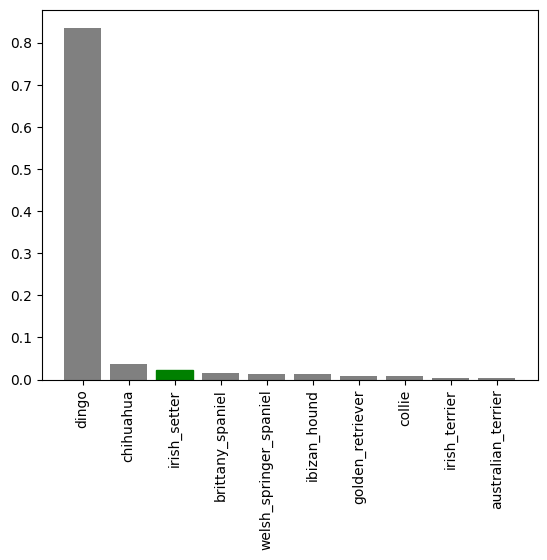

In [70]:
plot_pred_conf(predictions,val_labels,81)

Now we've got some function to help us visualize our predictions and evaluate our model, let's check out a few

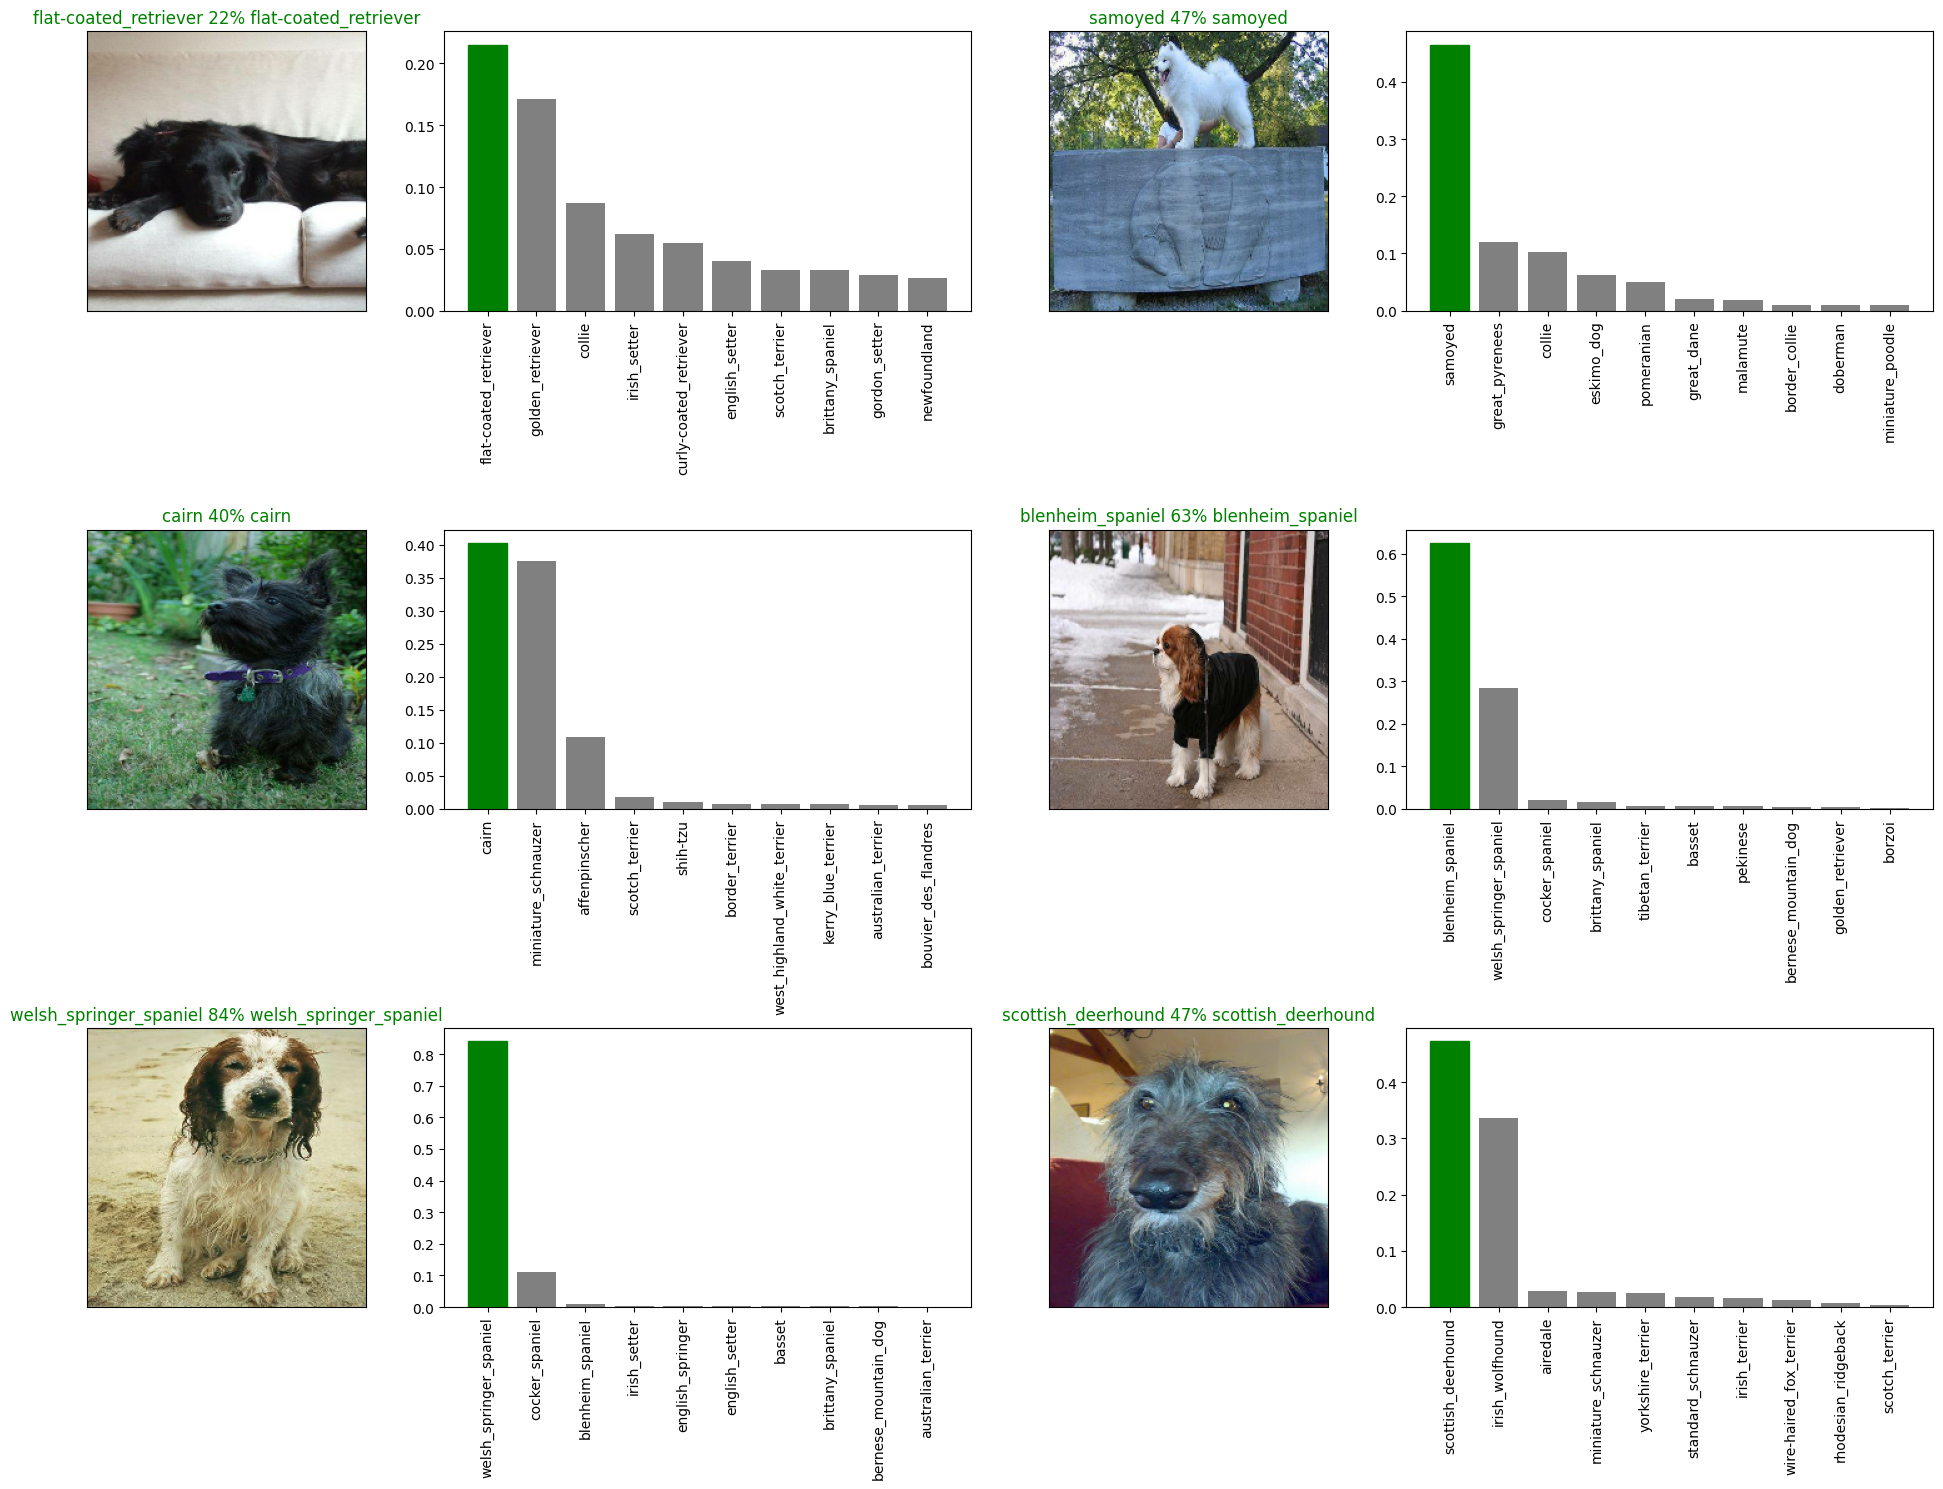

In [71]:
# Let's check our a few predictions and their different values

i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)

  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
  plt.tight_layout(h_pad=1.0)

## Saving and reloading a trained model

In [72]:
# Create and function to save a model
def save_model(model,suffix=None):
  """
  Saves a given model in a models directory and appends a suffix(string).
  """

  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/Dog_Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%"))

  model_path = modeldir+"-"+suffix+".h5"  # save format of a model

  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [73]:
# Create a function to load a model
def load_model(model_path):
  """
  Load a saved model from a specified paht.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,custom_objects={"KerasLayer":hub.KerasLayer})
  return model



In [74]:
# Save our model trained on 1000 images
save_model(model,suffix="1000-images-mobilenetv2-Adam")

Saving model to: drive/MyDrive/Dog_Vision/models/20240724-2001%-1000-images-mobilenetv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/MyDrive/Dog_Vision/models/20240724-2001%-1000-images-mobilenetv2-Adam.h5'

In [75]:
# Loading the trained model
loaded_1000_image_model = load_model('drive/MyDrive/Dog_Vision/models/20240721-10381721558321-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/MyDrive/Dog_Vision/models/20240721-10381721558321-1000-images-mobilenetv2-Adam.h5


In [76]:
# Evaluate the pre-saved model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 2s 131ms/step - loss: 1.3334 - accuracy: 0.6550


[1.3334143161773682, 0.6549999713897705]

## Training a big dog model (on full data)

In [77]:
len(X)  , len(y)

(10222, 10222)

In [78]:
X[0]  , y[0]

('drive/MyDrive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
     

In [79]:
# Create a data batch with the full data set
full_data = create_data_batches(X,y)

Creating training data batches...


In [80]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [81]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [82]:
# Create fulll model_callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [83]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 46s 132ms/step - loss: 1.3429 - accuracy: 0.6682
Epoch 2/100
320/320 [==============================] - 41s 127ms/step - loss: 0.4011 - accuracy: 0.8808
Epoch 3/100
320/320 [==============================] - 41s 129ms/step - loss: 0.2378 - accuracy: 0.9351
Epoch 4/100
320/320 [==============================] - 40s 125ms/step - loss: 0.1541 - accuracy: 0.9635
Epoch 5/100
320/320 [==============================] - 43s 135ms/step - loss: 0.1095 - accuracy: 0.9768
Epoch 6/100
320/320 [==============================] - 39s 123ms/step - loss: 0.0766 - accuracy: 0.9868
Epoch 7/100
320/320 [==============================] - 41s 130ms/step - loss: 0.0595 - accuracy: 0.9910
Epoch 8/100
320/320 [==============================] - 41s 127ms/step - loss: 0.0466 - accuracy: 0.9947
Epoch 9/100
320/320 [==============================] - 42s 133ms/step - loss: 0.0372 - accuracy: 0.9958
Epoch 10/100
320/320 [==============================] - 40s 126m

In [84]:
save_model(full_model,suffix="full-image-set-mobilenetv2-Adam")

Saving model to: drive/MyDrive/Dog_Vision/models/20240724-2016%-full-image-set-mobilenetv2-Adam.h5...


'drive/MyDrive/Dog_Vision/models/20240724-2016%-full-image-set-mobilenetv2-Adam.h5'

In [85]:
# Load the full model
loaded_full_model = load_model('drive/MyDrive/Dog_Vision/models/20240721-2009%-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: drive/MyDrive/Dog_Vision/models/20240721-2009%-full-image-set-mobilenetv2-Adam.h5


In [86]:
loaded_full_model

## Making predictions on test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data we'll:
*   Get the test image filenames
*   Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True`(since the test data doesn't have labels).
*   Make a predictions array by passing the test batches to the `predict()` method called on our model



In [87]:
# Load test image filenames
test_path = "drive/MyDrive/Dog_Vision/test/"
test_filenames = [test_path+ fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/Dog_Vision/test/f402e15e75051b9491283307b947680e.jpg',
 'drive/MyDrive/Dog_Vision/test/f414cc74bc9df7c993ca72c5ac986846.jpg',
 'drive/MyDrive/Dog_Vision/test/ef413ae9b0de80605bc95de2d12a4082.jpg',
 'drive/MyDrive/Dog_Vision/test/f1be08dee473f19c7e665b2eef018ff5.jpg',
 'drive/MyDrive/Dog_Vision/test/f31ffe7d14c530955f2d4c78b93f80eb.jpg',
 'drive/MyDrive/Dog_Vision/test/f16a73d54d86c0020bf1d63a29eb024b.jpg',
 'drive/MyDrive/Dog_Vision/test/ea1f200df74cd6c6a458436eedabbc8d.jpg',
 'drive/MyDrive/Dog_Vision/test/f4eb5c8121abd476cfc36684e74e83a5.jpg',
 'drive/MyDrive/Dog_Vision/test/f4e1d93f8d4f389547d69a5cd468e49d.jpg',
 'drive/MyDrive/Dog_Vision/test/f3fa4a19ad6e0a8a4b25467fb995fd7a.jpg']

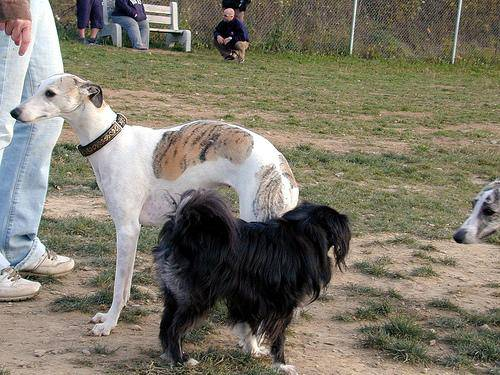

In [88]:
Image(test_filenames[0])

In [89]:
len(test_filenames)

10357

In [90]:
# Create test data batch
test_data  = create_data_batches(test_filenames,test_data=True)

Creating test data batches...


In [91]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [92]:
loaded_full_model

In [93]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 340s 1s/step


In [100]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetxt("drive/MyDrive/Dog_Vision/preds_array.csv",test_predictions,delimiter=",")

In [101]:
# Load predictions (NumPy array) from csv file
test_predictions = np.loadtxt("drive/MyDrive/Dog_Vision/preds.array.csv",delimiter=",")

In [102]:
test_predictions[:10]

array([[1.85761519e-06, 3.59139881e-06, 1.49115742e-08, ...,
        6.71884179e-01, 1.13207137e-03, 4.97696551e-10],
       [2.37440784e-14, 2.04775009e-14, 1.88692284e-09, ...,
        1.67482402e-12, 4.46118633e-14, 5.90017158e-16],
       [1.49309685e-08, 6.68386696e-04, 1.48486012e-09, ...,
        8.86699183e-07, 1.95517158e-10, 9.43019329e-10],
       ...,
       [2.22692051e-06, 2.28590658e-08, 5.85661297e-09, ...,
        2.41720022e-06, 9.93655995e-05, 6.40897974e-02],
       [9.67850366e-13, 9.99968767e-01, 7.75939424e-10, ...,
        5.63855584e-09, 1.69767398e-13, 5.30410026e-13],
       [1.11226561e-09, 1.79944072e-06, 8.11377701e-11, ...,
        1.24832567e-09, 1.94968022e-12, 4.80776592e-08]])

In [99]:
test_predictions.shape

(10357, 120)

## Preparing test dataset predictions for Kaggle

Looking at the Kaggle sample dog submission, we find that it wants our models predictions probability outputs in a DataFrame with an ID  and a column for each different dog breed.

To get the data in this format, we'll:
* Create a pandas DataFrame with an ID column as well as  a column for each dog breed.
* Add data to the ID column by extracting the test image ID'S from their filepaths.
* Add data(the prediction probabilities) to each of the dog breed columns.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [123]:
## Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns = ["id"]+list(unique_breed))
preds_df.T

Empty DataFrame
Columns: []
Index: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]

[121 rows x 0 columns]

In [124]:
test_filenames[:5]

['drive/MyDrive/Dog_Vision/test/f402e15e75051b9491283307b947680e.jpg',
 'drive/MyDrive/Dog_Vision/test/f414cc74bc9df7c993ca72c5ac986846.jpg',
 'drive/MyDrive/Dog_Vision/test/ef413ae9b0de80605bc95de2d12a4082.jpg',
 'drive/MyDrive/Dog_Vision/test/f1be08dee473f19c7e665b2eef018ff5.jpg',
 'drive/MyDrive/Dog_Vision/test/f31ffe7d14c530955f2d4c78b93f80eb.jpg']

In [125]:
test_filenames[0][30:][:-4]

'f402e15e75051b9491283307b947680e'

In [127]:
test_ids = []
for file in test_filenames:
  new_file = file[30:][:-4]
  test_ids.append(new_file)

In [130]:
preds_df["id"] = test_ids

In [131]:
preds_df.head()

id affenpinscher afghan_hound  \
0  f402e15e75051b9491283307b947680e           NaN          NaN   
1  f414cc74bc9df7c993ca72c5ac986846           NaN          NaN   
2  ef413ae9b0de80605bc95de2d12a4082           NaN          NaN   
3  f1be08dee473f19c7e665b2eef018ff5           NaN          NaN   
4  f31ffe7d14c530955f2d4c78b93f80eb           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [135]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breed)] = test_predictions

In [136]:
preds_df.head()

id  affenpinscher  afghan_hound  \
0  f402e15e75051b9491283307b947680e   1.857615e-06  3.591399e-06   
1  f414cc74bc9df7c993ca72c5ac986846   2.374408e-14  2.047750e-14   
2  ef413ae9b0de80605bc95de2d12a4082   1.493097e-08  6.683867e-04   
3  f1be08dee473f19c7e665b2eef018ff5   1.408687e-07  1.235584e-09   
4  f31ffe7d14c530955f2d4c78b93f80eb   2.064478e-03  1.346168e-05   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.491157e-08  2.638811e-12                    1.557524e-08   
1         1.886923e-09  1.862985e-12                    1.002314e-14   
2         1.484860e-09  1.726136e-04                    8.456869e-09   
3         5.010156e-13  2.794937e-12                    5.784153e-11   
4         4.418379e-07  2.042563e-04                    5.888773e-08   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  2.267536e-07        5.904052e-06  4.258289e-07  5.358341e-09  ...   
1  2.496281e-15        1.206690e-07  4.419053e-11  1.051778e-10  ...   
2  1.404122e-09        2.606880e-13  1.016260e-08  6.142735e-11  ...   
3  1.009038e-11        3.510192e-12  7.529457e-10  1.541673e-10  ...   
4  4.223888e-10        1.774271e-07  3.802230e-08  2.574093e-07  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  1.123178e-08  6.846723e-08  1.031897e-10  2.606278e-06  4.547301e-07   
1  1.526771e-14  3.507700e-11  4.221407e-14  2.363801e-15  3.037785e-16   
2  4.952910e-09  4.841942e-13  8.719049e-12  6.868101e-08  7.964398e-09   
3  1.272851e-08  1.499691e-10  4.090167e-10  4.714502e-10  2.003367e-10   
4  1.069212e-06  7.406738e-10  8.426438e-07  3.428334e-11  2.665776e-07   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            5.077215e-08                 3.036065e-09  6.718842e-01   
1            2.731043e-12                 2.710293e-11  1.674824e-12   
2            2.919913e-09                 1.216070e-10  8.866992e-07   
3            3.928854e-11                 1.018575e-11  1.049432e-14   
4            5.632858e-10                 5.331379e-12  2.427529e-05   

   wire-haired_fox_terrier  yorkshire_terrier  
0             1.132071e-03       4.976966e-10  
1             4.461186e-14       5.900172e-16  
2             1.955172e-10       9.430193e-10  
3             5.726121e-10       1.175535e-10  
4             9.987717e-09       5.202091e-06  

[5 rows x 121 columns]

In [137]:
# Save our predictions dataframe to csv for sumbission to Kaggle
preds_df.to_csv("drive/MyDrive/Dog_Vision/full_model_predictions_submission_1_mobilenetV2.csv",index=False)

# Making predictions on our custom images

In [138]:
path = "drive/MyDrive/Dog_Vision/custom.jpeg"

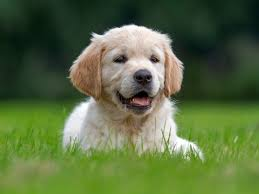

In [139]:
Image(path)

In [145]:
custom_path = []
custom_path.append(path)
custom_path

['drive/MyDrive/Dog_Vision/custom.jpeg']

In [146]:
custom_data = create_data_batches(custom_path,test_data = True)

Creating test data batches...


In [148]:
custom_pred = full_model.predict(custom_data)

1/1 [==============================] - 0s 27ms/step


In [175]:
unique_breed[np.argmax(custom_pred)]

'golden_retriever'

In [167]:
custom_pred[0][1]

1.814858e-08

In [174]:
iter = np.argsort(custom_pred)
for i in range(10):
  id = iter[0][119-i]
  print(unique_breed[id],custom_pred[0][id])

golden_retriever 0.9797021
otterhound 0.0105298115
sussex_spaniel 0.0021538774
newfoundland 0.0012930328
labrador_retriever 0.001130952
miniature_poodle 0.0010623718
clumber 0.0010618663
english_setter 0.00095052016
blenheim_spaniel 0.00055148586
kuvasz 0.0004468363


In [173]:
iter

array([[ 60,  64,  75,  54,  96,  55,  62,  37,  74,  38,   7,   2,  10,
         21,  72,  19,  51,  84,  77, 117, 116,  59,  20,  86,  80,  47,
        119,   3, 110,  46,  73,  63, 111,  36,  94,   1,  41,  48,  56,
         22, 101,   8,  26,   5,  27, 106,  95,  43,  93, 104,  58,  90,
         17,   6,  57,  16,  89, 103,  29,  87,  71,  33,  88, 108, 114,
         91, 109, 118,  82,  12, 113,  34,  15,  23,  53, 115,  18,  14,
         68,   0,  99, 100,  98,  81,  30,  70,  42,  65,  69,   4,   9,
        105,  97,  11,  61, 102,  25,  92,  28,  45,  50,  79, 112,  35,
         32,  52,  39,  85,  44,  24,  66,  13,  40,  31,  76,  67,  78,
        107,  83,  49]])